# **Quantitative analysis using stock price data and technical indicators**

---
---

### **Setup**

---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
import talib

### **1. Data Preparation and Cleaning**

----

### Tickers
- AAPL: Apple Inc.
- AMZN: Amazon.com. Inc.
- GOOG: Alphabet Inc. (Class C)
- FB: Meta Platforms, Inc.
- MSF: Microsoft Corporation
- NVDA: NVIDIA Corporation
- TSLA: Tesla, Inc.

In [2]:
# Load a CSV file from your local file system
df_Apple = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/AAPL_historical_data.csv')
df_Amazon = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/AMZN_historical_data.csv')
df_Alphabet = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/GOOG_historical_data.csv')
df_Meta = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/META_historical_data.csv')
df_Microsoft = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/MSFT_historical_data.csv')
df_NVIDIA = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/NVDA_historical_data.csv')
df_TSLA = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/yfinance_data/TSLA_historical_data.csv')

# Add a 'Ticker' column to each DataFrame
df_Apple['Ticker'] = 'AAPL'
df_Amazon['Ticker'] = 'AMZN'
df_Alphabet['Ticker'] = 'GOOG'
df_Meta['Ticker'] = 'FB'
df_Microsoft['Ticker'] = 'MSF'
df_NVIDIA['Ticker'] = 'NVDA'
df_TSLA['Ticker'] = 'TSLA'

# Combine all DataFrames into one
df = pd.concat([df_Apple, df_Amazon, df_Alphabet, df_Meta, df_Microsoft, df_NVIDIA, df_TSLA], ignore_index=True)

In [3]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

# Convert 'date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

# Filter rows where date is from 2020 onwards
df = df[df['Date'] >= '2020-01-01']

# Convert 'Date' column to datetime if not already
df['Date']= pd.to_datetime(df['Date'], errors='coerce')


# Drop rows with missing or invalid dates
df = df.dropna(subset=['Date'])


# Ensure numeric columns are correct type
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Drop rows with any remaining missing values in critical columns
df = df.dropna(subset=numeric_cols)


# Reset index after cleaning
df = df.reset_index(drop=True)


# Display cleaned dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   Ticker        45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB
None
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 10 columns):
 #   Col

### **Summary of Data Preparation**

The data preparation process for the stock price dataset included the following steps:

- **Missing Values & Data Types:** Checked for missing values and verified data types for all columns. The combined DataFrame `df` contains no missing values in critical columns.
- **Date Conversion:** Converted the 'Date' column to `datetime64[ns]` format for accurate time series analysis.
- **Numeric Columns:** Ensured all price and volume-related columns (`Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`, `Dividends`, `Stock Splits`) are of numeric type, coercing errors to NaN and dropping any resulting invalid rows.
- **Data Cleaning:** Removed rows with missing or invalid dates and dropped rows with missing values in any of the numeric columns to maintain data quality.
- **Index Reset:** Reset the DataFrame index after cleaning for consistency.
- **Result:** The cleaned DataFrame `df` contains 45,428 rows and 10 columns of reliable, well-typed historical stock data for multiple major companies (AAPL, AMZN, GOOG, FB, MSF, NVDA, TSLA), ready for further analysis.

----

### **2. Technical Indicator Computation**

### **Moving Averages (MA)**

In [4]:
# Get unique tickers from the dataframe
tickers = df['Ticker'].unique()

# Calculate 20-day and 50-day Simple Moving Averages (SMA) using TA-Lib for each ticker
for t in tickers:
    mask = df['Ticker'] == t
    close_prices = df.loc[mask, 'Close'].values
    df.loc[mask, 'TA_SMA_20'] = talib.SMA(close_prices, timeperiod=20)
    df.loc[mask, 'TA_SMA_50'] = talib.SMA(close_prices, timeperiod=50)

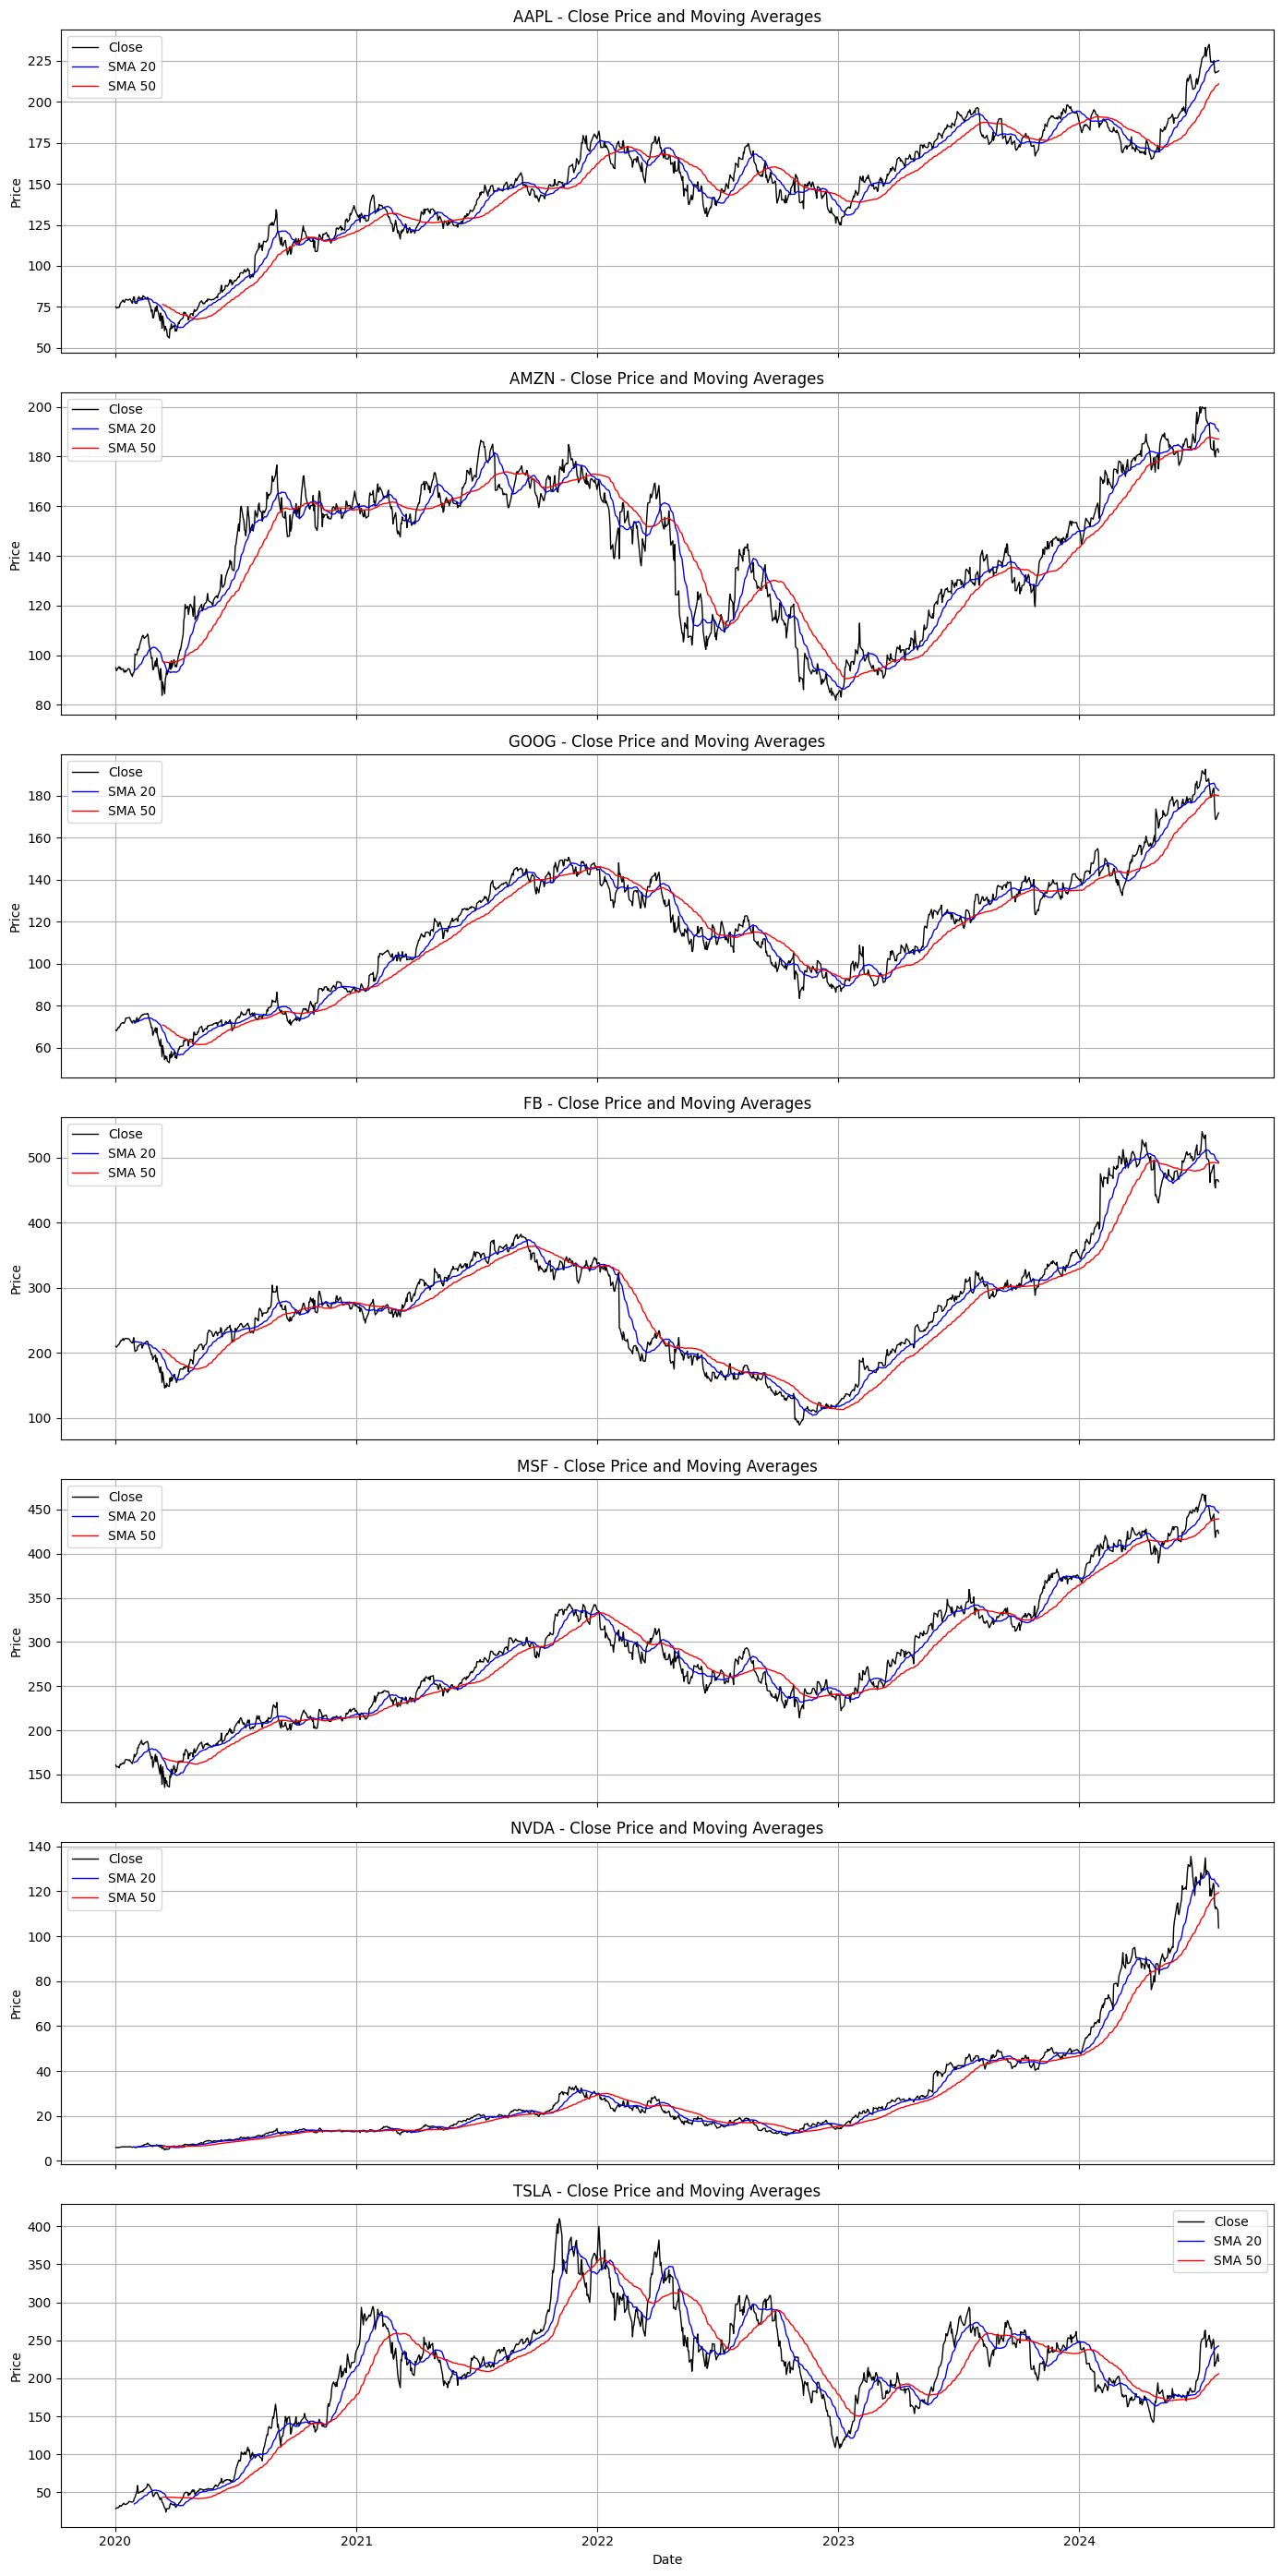

In [5]:
# Create a plot for each ticker showing Close price, 20-day SMA, and 50-day SMA
num_tickers = len(tickers)
fig, axes = plt.subplots(num_tickers, 1, figsize=(14, 4 * num_tickers), sharex=True)

if num_tickers == 1:
    axes = [axes]

for i, ticker in enumerate(tickers):
    ax = axes[i]
    data = df[df['Ticker'] == ticker]
    ax.plot(data['Date'], data['Close'], label='Close', color='black', linewidth=1)
    ax.plot(data['Date'], data['TA_SMA_20'], label='SMA 20', color='blue', linewidth=1)
    ax.plot(data['Date'], data['TA_SMA_50'], label='SMA 50', color='red', linewidth=1)
    ax.set_title(f"{ticker} - Close Price and Moving Averages")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

### **Summary: Moving Averages (MA) Calculation and Visualization**

In this section, the notebook computes and visualizes Simple Moving Averages (SMA) for each stock ticker in the dataset:

- **SMA Calculation:**  
    - The 20-day (`TA_SMA_20`) and 50-day (`TA_SMA_50`) SMAs are calculated for each ticker using the `SMA` function from the `talib` library.
    - The calculation is performed within each ticker group to ensure rolling averages are computed correctly for each stock.

- **Data Integration:**  
    - The resulting SMA values are added as new columns (`TA_SMA_20`, `TA_SMA_50`) to the main DataFrame `df`, aligning with each row's date and ticker.

- **Visualization:**  
    - For each ticker, a subplot is created showing the historical closing price along with the 20-day and 50-day SMA overlays.
    - This visualization helps to identify price trends and potential support/resistance levels for each stock.

This approach provides a clear, comparative view of short-term and medium-term price trends across all selected stocks, laying the groundwork for further technical analysis.

----

### **Relative Strength Index (RSI)**

In [6]:
# Calculate 14-day RSI using TA-Lib for each ticker and add as a new column
for t in tickers:
    mask = df['Ticker'] == t
    close_prices = df.loc[mask, 'Close'].values
    df.loc[mask, 'TA_RSI_14'] = talib.RSI(close_prices, timeperiod=14)

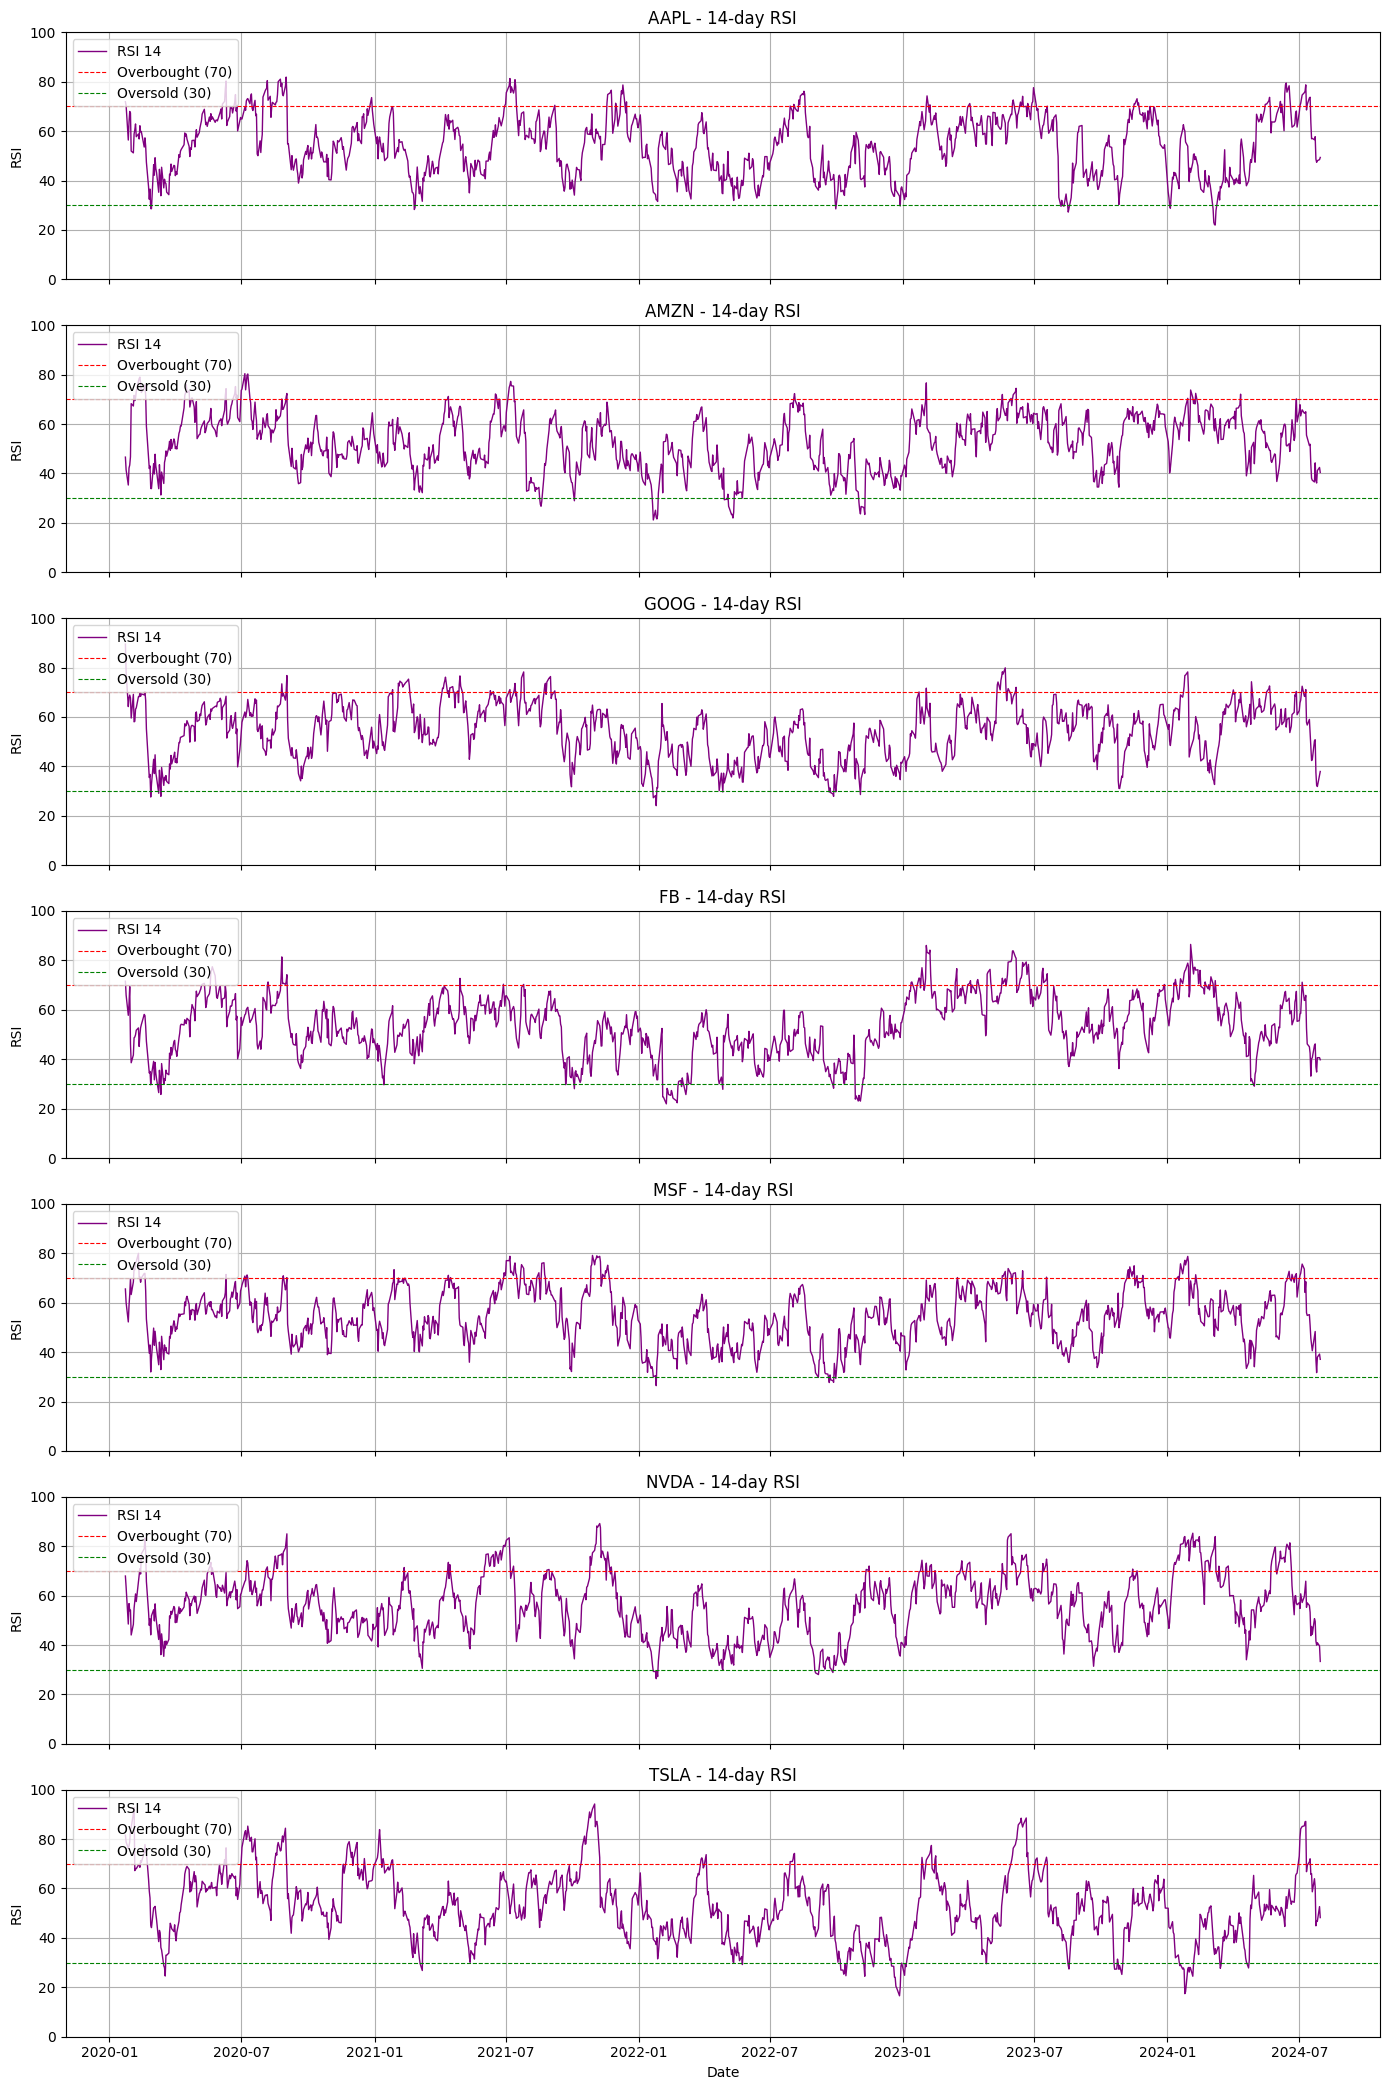

In [7]:
# Create a plot for each ticker showing the 14-day RSI
fig, axes_rsi = plt.subplots(num_tickers, 1, figsize=(14, 3 * num_tickers), sharex=True)

if num_tickers == 1:
    axes_rsi = [axes_rsi]

for i, ticker in enumerate(tickers):
    ax_rsi = axes_rsi[i]
    data_ticker = df[df['Ticker'] == ticker]
    ax_rsi.plot(data_ticker['Date'], data_ticker['TA_RSI_14'], label='RSI 14', color='purple', linewidth=1)
    ax_rsi.axhline(70, color='red', linestyle='--', linewidth=0.8, label='Overbought (70)')
    ax_rsi.axhline(30, color='green', linestyle='--', linewidth=0.8, label='Oversold (30)')
    ax_rsi.set_title(f"{ticker} - 14-day RSI")
    ax_rsi.set_ylabel("RSI")
    ax_rsi.set_ylim(0, 100)
    ax_rsi.legend(loc='upper left')
    ax_rsi.grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

### **Summary: Relative Strength Index (RSI) Calculation and Visualization**

In this section, the notebook computes and visualizes the 14-day Relative Strength Index (RSI) for each stock ticker:

- **RSI Calculation:**  
    - The 14-day RSI (`TA_RSI_14`) is calculated for each ticker using the `talib.RSI` function, applied to the closing prices within each ticker group.
    - The computed RSI values are added as a new column to the main DataFrame `df`.

- **Visualization:**  
    - For each ticker, a subplot displays the historical 14-day RSI values.
    - Reference lines at RSI levels 70 (overbought) and 30 (oversold) are included to highlight potential reversal zones.

- **Interpretation:**  
    - The RSI plots help identify periods when a stock may be overbought (RSI > 70) or oversold (RSI < 30), which can signal potential trend reversals or entry/exit points.
    - This analysis provides valuable insights into the momentum and strength of price movements for each stock, supporting more informed trading decisions.

---

### **Moving Average Convergence Divergence (MACD)**

In [8]:
# Calculate MACD, MACD Signal, and MACD Histogram using TA-Lib for each ticker and add as new columns
for t in tickers:
    mask = df['Ticker'] == t
    close_prices = df.loc[mask, 'Close'].values
    macd, macdsignal, macdhist = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
    df.loc[mask, 'TA_MACD'] = macd
    df.loc[mask, 'TA_MACD_SIGNAL'] = macdsignal
    df.loc[mask, 'TA_MACD_HIST'] = macdhist

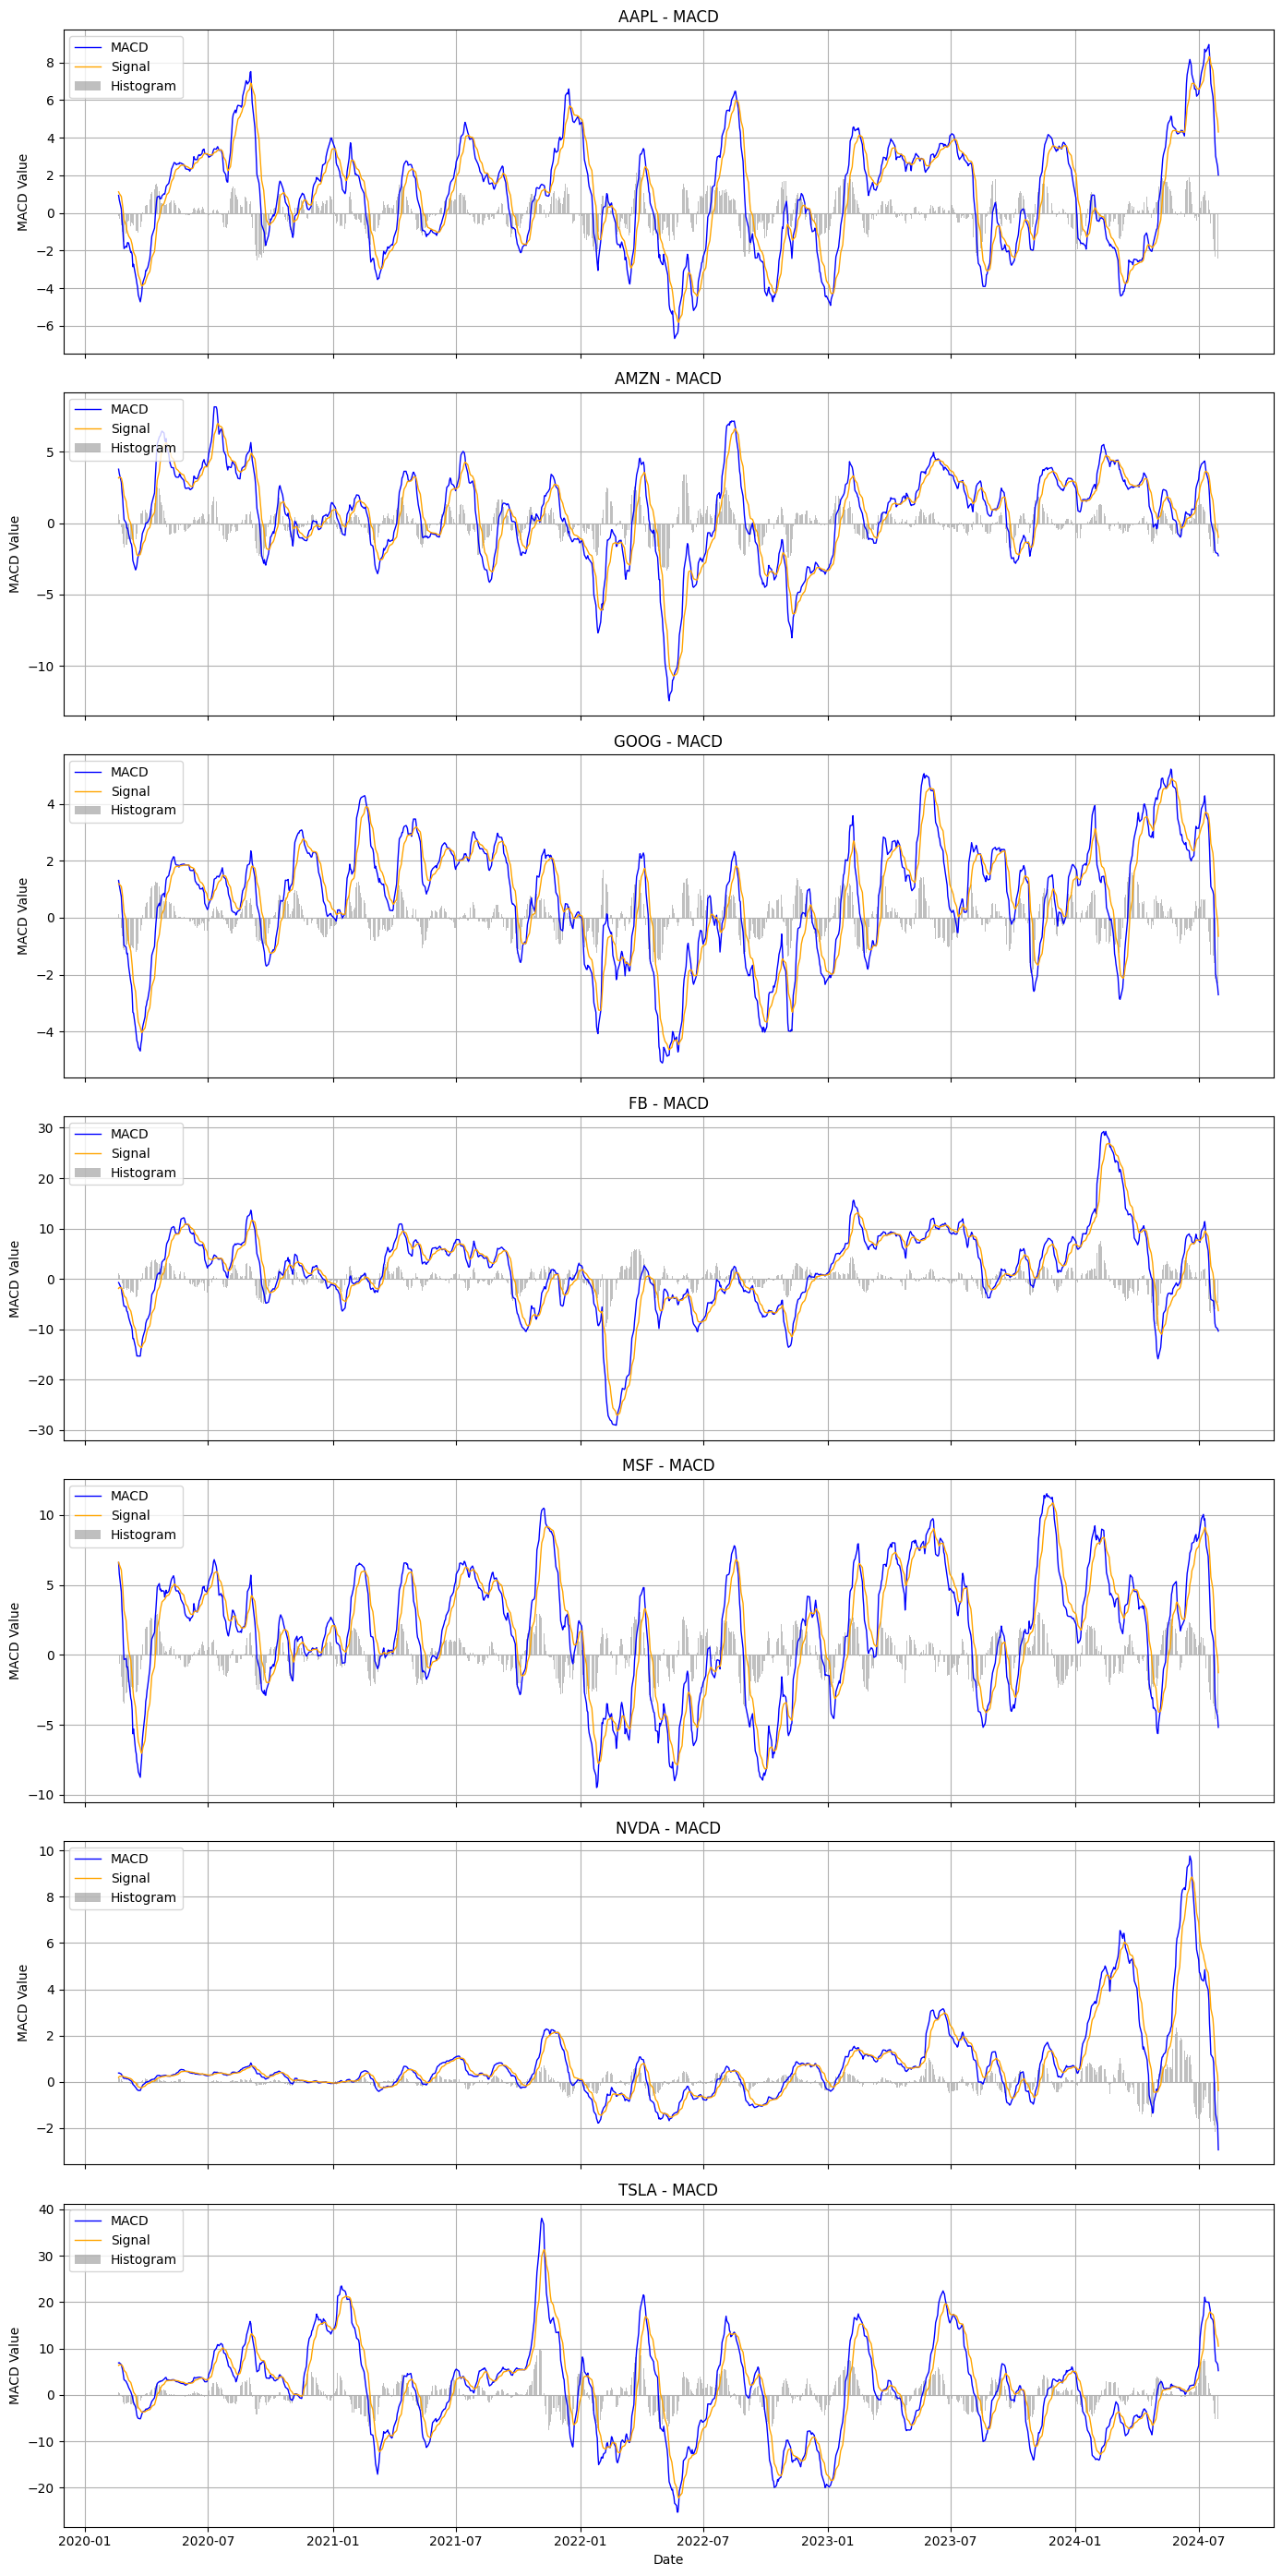

In [9]:
# Create a plot for each ticker showing MACD, MACD Signal, and MACD Histogram
fig_macd, axes_macd = plt.subplots(num_tickers, 1, figsize=(14, 4 * num_tickers), sharex=True)

if num_tickers == 1:
    axes_macd = [axes_macd]

for i, ticker in enumerate(tickers):
    ax_macd = axes_macd[i]
    data_macd = df[df['Ticker'] == ticker]
    ax_macd.plot(data_macd['Date'], data_macd['TA_MACD'], label='MACD', color='blue', linewidth=1)
    ax_macd.plot(data_macd['Date'], data_macd['TA_MACD_SIGNAL'], label='Signal', color='orange', linewidth=1)
    ax_macd.bar(data_macd['Date'], data_macd['TA_MACD_HIST'], label='Histogram', color='gray', alpha=0.5, width=1)
    ax_macd.set_title(f"{ticker} - MACD")
    ax_macd.set_ylabel("MACD Value")
    ax_macd.legend(loc='upper left')
    ax_macd.grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()

### **Summary: MACD Calculation and Visualization**

In this section, the notebook computes and visualizes the Moving Average Convergence Divergence (MACD) indicator for each stock ticker:

- **MACD Calculation:**  
    - The MACD, Signal line, and Histogram are calculated for each ticker using the `talib.MACD` function, applied to the closing prices within each ticker group.
    - The computed values are added as new columns (`TA_MACD`, `TA_MACD_SIGNAL`, `TA_MACD_HIST`) to the main DataFrame `df`.

- **Visualization:**  
    - For each ticker, a subplot displays the MACD line, Signal line, and Histogram over time.
    - The MACD plot helps to identify trend direction, momentum, and potential buy/sell signals based on crossovers and histogram peaks.

- **Interpretation:**  
    - MACD crossovers (when the MACD line crosses above or below the Signal line) can indicate potential entry or exit points.
    - The histogram visualizes the difference between the MACD and Signal lines, highlighting the strength of momentum shifts.
    - This analysis provides deeper insight into the underlying momentum and trend reversals for each stock, supporting more robust trading strategies.

---